In [88]:
# import library
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

plt.style.use(style='ggplot')
np.random.seed(1234)
random.seed(1234)

In [89]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/sample_submission.csv")

In [90]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [92]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [93]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [94]:
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [95]:
all_df = pd.concat([train_df, test_df], axis=0, sort=False).reset_index(drop=True)

In [96]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [97]:
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [98]:
all_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [99]:
from sklearn.preprocessing import LabelEncoder

categories = all_df.columns[all_df.dtypes == "object"]
print(categories)
print(len(categories))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


In [100]:
all_df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [101]:
for cat in categories:
    le = LabelEncoder()
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

In [102]:
all_df.isnull().sum()[all_df.isnull().sum() != 0]

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [103]:
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [104]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [105]:
import lightgbm as lgb

In [106]:
from sklearn.model_selection import KFold

folds = 3
kf = KFold(n_splits=folds)

In [107]:
lgbm_params = {"objective": "regression", "random_seed": 1234}

In [108]:
train_X = train_df_le.drop(["SalePrice", "Id"], axis=1)
train_Y = train_df_le["SalePrice"]

In [109]:
train_X.isna().sum()[train_X.isna().sum() != 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [110]:
train_Y.isna().sum()

0

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.59541e+09
[20]	valid_0's l2: 7.467e+08
[30]	valid_0's l2: 5.96558e+08
[40]	valid_0's l2: 5.49479e+08
[50]	valid_0's l2: 5.29299e+08
[60]	valid_0's l2: 5.28785e+08
[70]	valid_0's l2: 5.32577e+08
Early stopping, best iteration is:
[57]	valid_0's l2: 5.26368e+08
0.12637668452645173
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 2.08125e+09
[20]	valid_0's l2: 1.23117e+09
[30]	valid_0's l2: 1.04155e+09
[40]	valid_0's l2: 9.92123e+08
[50]	valid_0's l2: 9.69222e+08
[60]	valid_0's l2: 9.54807e+08
[70]	valid_0's l2: 9.50536e+08
[80]	valid_0's l2: 9.45353e+08
[90]	valid_0's l2: 9.40359e+08
[100]	valid_0's l2: 9.36486e+08
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 9.36066e+08


0.15229205843857013
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.78839e+09
[20]	valid_0's l2: 1.03494e+09
[30]	valid_0's l2: 8.77181e+08
[40]	valid_0's l2: 8.59747e+08
[50]	valid_0's l2: 8.45919e+08
[60]	valid_0's l2: 8.35019e+08
[70]	valid_0's l2: 8.27851e+08
[80]	valid_0's l2: 8.37089e+08
Early stopping, best iteration is:
[69]	valid_0's l2: 8.26998e+08
0.13226664456356535


In [113]:
sum(rmses) / len(rmses)

0.13697846250952908

In [114]:
actual_pred_df = pd.DataFrame({"actual": train_Y, "pred": oof})

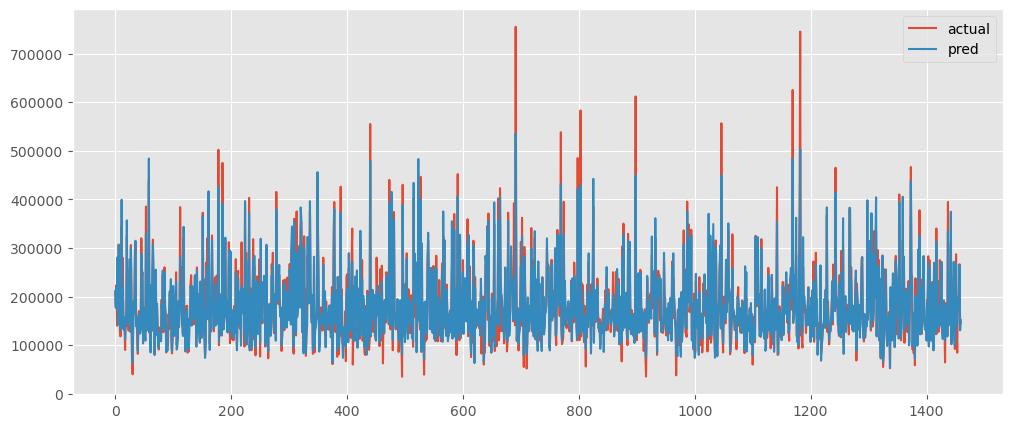

In [115]:
actual_pred_df.plot(figsize=(12, 5))

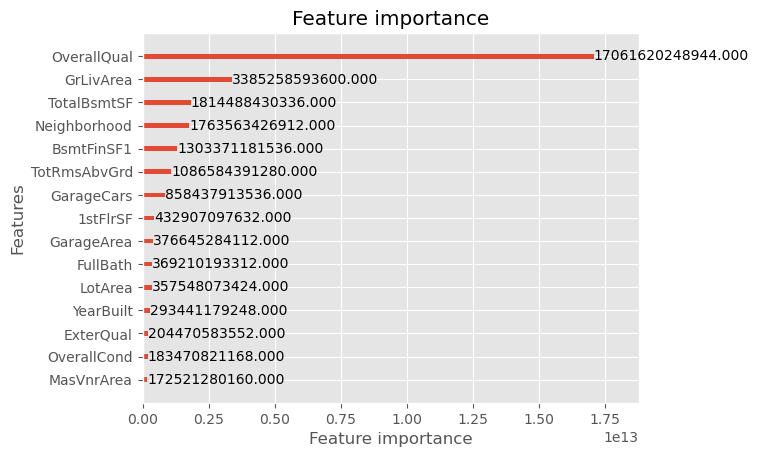

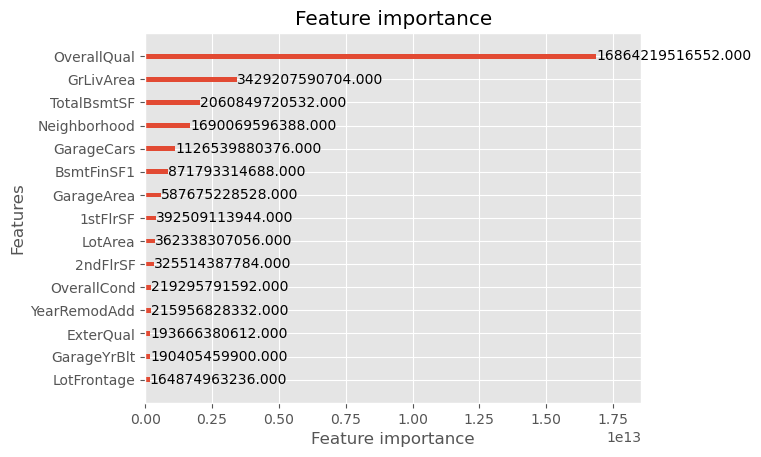

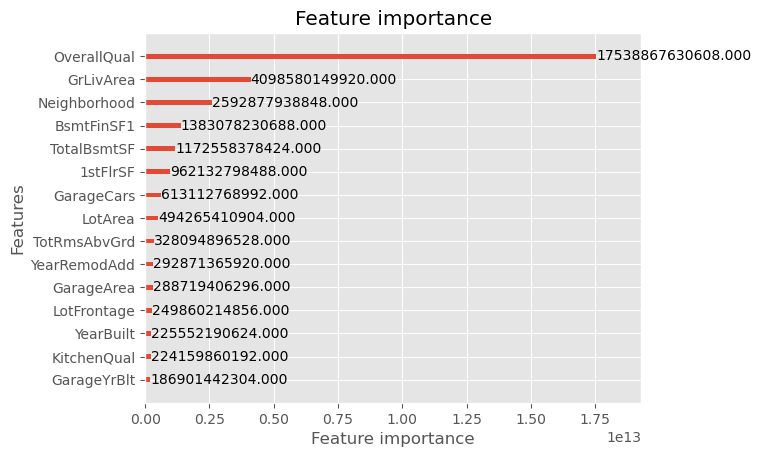

In [116]:
for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

In [117]:
result = models[0].predict(test_df_le.drop(["SalePrice", "Id"], axis=1))
submission["SalePrice"] = result
submission.to_csv("./submit/submission00.csv", index=False)

In [118]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

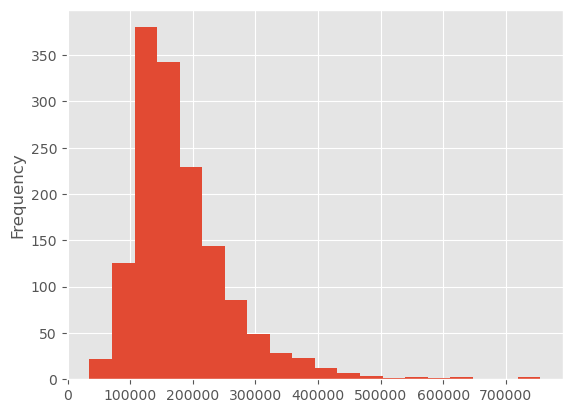

In [119]:
train_df["SalePrice"].plot.hist(bins=20)

In [120]:
np.log(train_df["SalePrice"])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

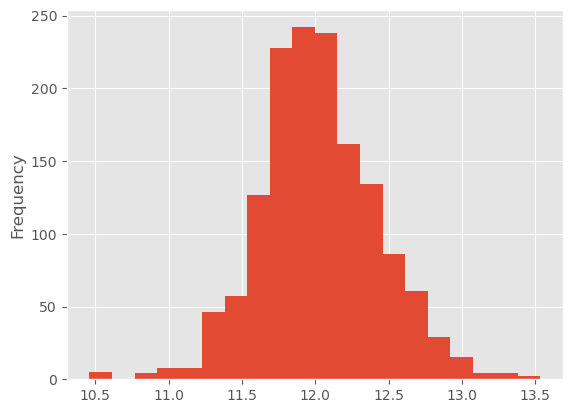

In [121]:
np.log(train_df["SalePrice"]).plot.hist(bins=20)

In [122]:
pd.options.mode.chained_assignment = None
train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

In [123]:
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [124]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [125]:
train_Y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice_log, Length: 1460, dtype: float64

In [126]:
import warnings

warnings.filterwarnings("ignore")

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0435757
[20]	valid_0's l2: 0.0223987
[30]	valid_0's l2: 0.0176962
[40]	valid_0's l2: 0.0164304
[50]	valid_0's l2: 0.0161943
[60]	valid_0's l2: 0.0161858
[70]	valid_0's l2: 0.0161666
[80]	valid_0's l2: 0.0161769
[90]	valid_0's l2: 0.0162121
Early stopping, best iteration is:
[73]	valid_0's l2: 0.0161129
0.12693572281592597
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0480056
[20]	valid_0's l2: 0.0274907
[30]	valid_0's l2: 0.022779
[40]	valid_0's l2: 0.0214744
[50]	valid_0's l2: 0.0209095
[60]	valid_0's l2: 0.0205922
[70]	valid_0's l2: 0.0204381
[80]	valid_0's l2: 0.0203135
[90]	valid_0's l2: 0.020318
[100]	valid_0's l2: 0.0202246
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0202246
0.1422133338842566
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0388654
[20]	valid_0's l2: 0.0209198
[30]	valid_0's l2: 0.0176337

In [127]:
result = models[0].predict(test_df_le.drop(["SalePrice", "Id"], axis=1))
submission["SalePrice"] = np.exp(result)
submission.to_csv("./submit/submission01.csv", index=False)

In [128]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/sample_submission.csv")

all_df = pd.concat([train_df, test_df], axis=0, sort=False).reset_index(drop=True)

categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [129]:
all_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
BsmtUnfSF          1
Electrical         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Street             0
RoofMatl           0
MSSubClass         0
LotArea            0
OverallCond        0
dtype: int64

In [130]:
all_df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [131]:
all_df.loc[~all_df["PoolQC"].isnull(), "PoolQC"] = 1
all_df.loc[all_df["PoolQC"].isnull(), "PoolQC"] = 0

In [132]:
all_df["PoolQC"].value_counts()

0    2909
1      10
Name: PoolQC, dtype: int64

In [133]:
all_df.loc[~all_df["MiscFeature"].isnull(), "MiscFeature"] = 1
all_df.loc[all_df["MiscFeature"].isnull(), "MiscFeature"] = 0

In [134]:
all_df.loc[~all_df["Alley"].isnull(), "Alley"] = 1
all_df.loc[all_df["Alley"].isnull(), "Alley"] = 0

In [135]:
all_df["hasHightFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]

In [136]:
all_df["hasHightFacility"] = all_df["hasHightFacility"].astype(int)

In [137]:
all_df["hasHightFacility"].value_counts()

0    2615
1     295
2       9
Name: hasHightFacility, dtype: int64

In [138]:
all_df = all_df.drop(["PoolQC", "MiscFeature", "Alley"], axis=1)

In [139]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [140]:
train_df_num = train_df.select_dtypes(include=[np.number])

In [141]:
nonratio_features = [
    "ID",
    "MSSubClass",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MoSold",
    "YrSold",
]

In [142]:
num_features = sorted(list(set(train_df_num) - set(nonratio_features)))

In [143]:
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [144]:
train_df_num_rs = train_df_num[num_features]

In [145]:
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col] == 0]))

3SsnPorch 1436
BsmtFinSF2 1293


BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


In [146]:
for col in num_features:
    if train_df_num_rs[col].nunique() < 15:
        print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12


In [147]:
for col in num_features:
    sigma = train_df_num_rs[col].std()
    mean = train_df_num_rs[col].mean()
    tmp_df = train_df_num_rs[
        (train_df_num_rs[col] > mean + sigma * 3)
        | (train_df_num_rs[col] < mean - sigma * 3)
    ]
    print(col, len(tmp_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
Id 0
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


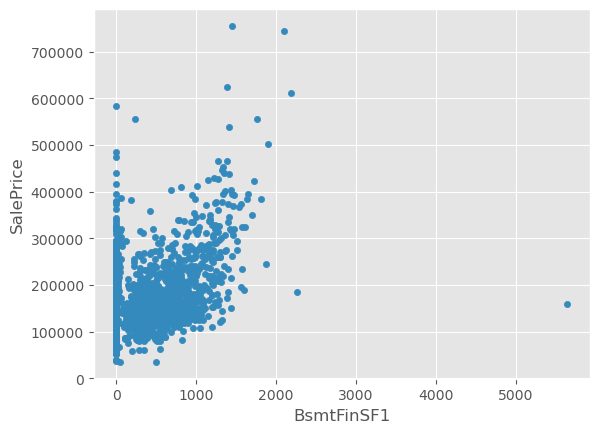

In [148]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [149]:
all_df[all_df["TotalBsmtSF"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHightFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


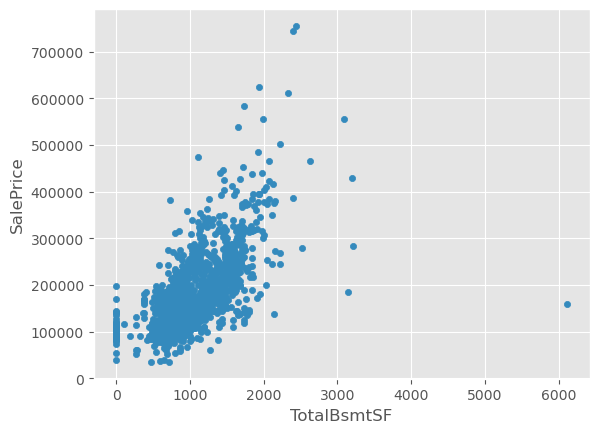

In [150]:
all_df.plot.scatter(x="TotalBsmtSF", y="SalePrice")

In [151]:
all_df[all_df["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHightFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


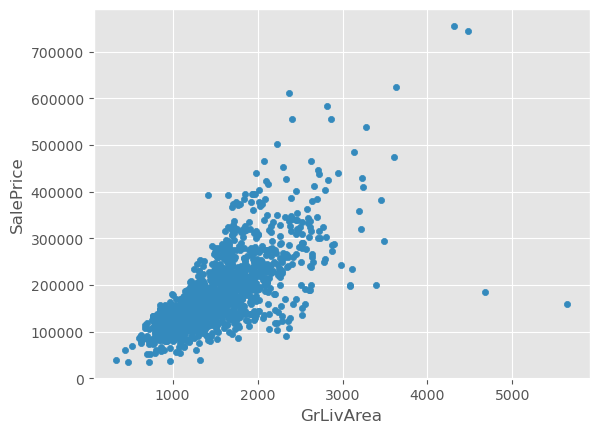

In [152]:
all_df.plot.scatter(x="GrLivArea", y="SalePrice")

In [153]:
all_df[all_df["GrLivArea"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHightFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


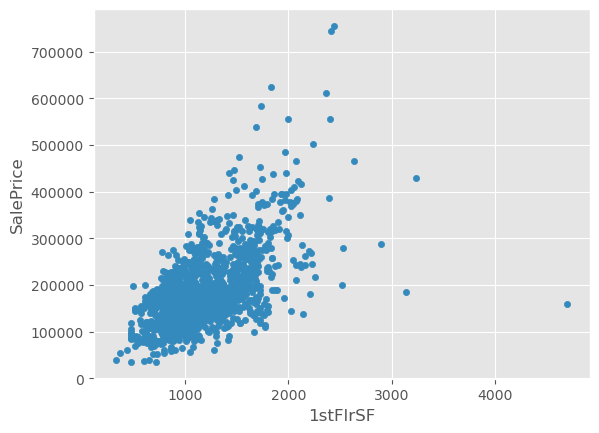

In [154]:
all_df.plot.scatter(x="1stFlrSF", y="SalePrice")

In [155]:
all_df[all_df["1stFlrSF"] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHightFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


In [156]:
all_df = all_df[(all_df["BsmtFinSF1"] < 2000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["TotalBsmtSF"] < 3000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["GrLivArea"] < 4500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["1stFlrSF"] < 2500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["LotArea"] < 100000) | (all_df["SalePrice"].isnull())]

In [157]:
categories = categories.drop(["PoolQC", "MiscFeature", "Alley"])

In [158]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [159]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [160]:
train_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,hasHightFacility
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,4,0,2,2008,8,4,0
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,4,0,5,2007,8,4,0
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,4,0,9,2008,8,4,0
3,70,3,60.0,9550,1,0,3,0,0,0,...,0,0,0,4,0,2,2006,8,0,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,4,0,12,2008,8,4,0


In [161]:
train_Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_log, dtype: float64

In [162]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0424478
[20]	valid_0's l2: 0.0222118
[30]	valid_0's l2: 0.0175757
[40]	valid_0's l2: 0.0165142
[50]	valid_0's l2: 0.0164264
[60]	valid_0's l2: 0.016285
[70]	valid_0's l2: 0.0163922
[80]	valid_0's l2: 0.0163238
Early stopping, best iteration is:
[62]	valid_0's l2: 0.0162509
0.12745948164738202
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.047333
[20]	valid_0's l2: 0.0272932
[30]	valid_0's l2: 0.0223134
[40]	valid_0's l2: 0.0209381
[50]	valid_0's l2: 0.0203039
[60]	valid_0's l2: 0.0200215
[70]	valid_0's l2: 0.0197188
[80]	valid_0's l2: 0.0196559
[90]	valid_0's l2: 0.0195579
[100]	valid_0's l2: 0.0195231
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.0195208
0.13971669031954484
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0368757
[20]	valid_0's l2: 0.0197062
[30]	valid_0's l2: 0.0167971
[40]	valid_0's l2: 0.0158749

In [164]:
result = models[2].predict(test_df_le.drop(["SalePrice", "Id"], axis=1))
submission["SalePrice"] = np.exp(result)
submission.to_csv("./submit/submission02.csv", index=False)

In [166]:
all_df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2904.000000,2904.000000,2745.000000,2904.000000
mean,1971.234504,1984.217975,1978.061202,2007.792011
std,30.319059,20.907346,25.600996,1.316366
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1953.000000,1965.000000,1960.000000,2007.000000
50%,1973.000000,1993.000000,1979.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [167]:
all_df["Age"] = all_df["YrSold"] - all_df["YearBuilt"]

In [169]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [170]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0427712
[20]	valid_0's l2: 0.0222468
[30]	valid_0's l2: 0.0177147
[40]	valid_0's l2: 0.016571
[50]	valid_0's l2: 0.0161945
[60]	valid_0's l2: 0.0161879
[70]	valid_0's l2: 0.0161968
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0161388
0.12704034420133195
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0474374
[20]	valid_0's l2: 0.027474
[30]	valid_0's l2: 0.0225527
[40]	valid_0's l2: 0.0207551
[50]	valid_0's l2: 0.0202749
[60]	valid_0's l2: 0.0200399
[70]	valid_0's l2: 0.0198921
[80]	valid_0's l2: 0.0198431
[90]	valid_0's l2: 0.0197761
[100]	valid_0's l2: 0.019663
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.019663
0.14022471834012856
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0369248
[20]	valid_0's l2: 0.0195778
[30]	valid_0's l2: 0.016538
[40]	valid_0's l2: 0.0153916
[50]	valid_0's l2: 0.0149941
[

In [172]:
all_df[
    [
        "LotArea",
        "MasVnrArea",
        "BsmtUnfSF",
        "1stFlrSF",
        "2ndFlrSF",
        "LowQualFinSF",
        "GrLivArea",
        "GarageArea",
        "WoodDeckSF",
        "OpenPorchSF",
        "EnclosedPorch",
        "3SsnPorch",
        "ScreenPorch",
        "PoolArea",
        "LotFrontage",
    ]
].describe()

,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotFrontage
count,2904.000000,2882.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2425.000000
mean,9912.604683,101.191187,559.850499,1152.707300,336.355372,4.718664,1493.781336,471.632794,93.265840,47.226584,22.988636,2.615702,16.086777,1.907025,69.071340
std,5178.128224,177.804595,438.438879,377.291394,427.355787,46.515308,491.149725,214.551791,125.855568,67.195477,64.055325,25.252464,56.245764,33.082892,22.662001
min,1300.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7448.250000,0.000000,220.000000,875.750000,0.000000,0.000000,1124.000000,319.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000
50%,9422.000000,0.000000,467.000000,1080.000000,0.000000,0.000000,1441.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,68.000000
75%,11503.000000,164.000000,802.500000,1381.250000,704.000000,0.000000,1739.250000,576.000000,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000,80.000000
max,70761.000000,1600.000000,2336.000000,5095.000000,1872.000000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,313.000000


In [173]:
all_df["TotalSF"] = all_df["TotalBsmtSF"] + all_df["1stFlrSF"] + all_df["2ndFlrSF"]
all_df["Total_bathrooms"] = (
    all_df["FullBath"]
    + all_df["HalfBath"]
    + all_df["BsmtFullBath"]
    + all_df["BsmtHalfBath"]
)

In [174]:
all_df["Total_PorchSF"] = (
    all_df["OpenPorchSF"]
    + all_df["3SsnPorch"]
    + all_df["EnclosedPorch"]
    + all_df["ScreenPorch"]
    + all_df["WoodDeckSF"]
)

In [175]:
all_df["hasPorch"] = all_df["Total_PorchSF"].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop(["Total_PorchSF"], axis=1)

In [176]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [177]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0388049
[20]	valid_0's l2: 0.0199263
[30]	valid_0's l2: 0.0165969
[40]	valid_0's l2: 0.0158728
[50]	valid_0's l2: 0.0157388
[60]	valid_0's l2: 0.015844
Early stopping, best iteration is:
[49]	valid_0's l2: 0.0157164
0.12536497336459065
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0459281
[20]	valid_0's l2: 0.0262784
[30]	valid_0's l2: 0.0217831
[40]	valid_0's l2: 0.0205294
[50]	valid_0's l2: 0.0201039
[60]	valid_0's l2: 0.0198874
[70]	valid_0's l2: 0.019815
[80]	valid_0's l2: 0.0198968
Early stopping, best iteration is:
[65]	valid_0's l2: 0.0197659
0.14059120440349726
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0354828
[20]	valid_0's l2: 0.0183241
[30]	valid_0's l2: 0.0154847
[40]	valid_0's l2: 0.0145868
[50]	valid_0's l2: 0.0143982
[60]	valid_0's l2: 0.0142851
[70]	valid_0's l2: 0.0144113
Early stopping, best iteration is:
[56]	va

In [178]:
result = models[2].predict(test_df_le.drop(["SalePrice", "Id"], axis=1))
submission["SalePrice"] = np.exp(result)
submission.to_csv("./submit/submission04.csv", index=False)

In [179]:
import optuna

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    train_X, train_Y, test_size=0.2, random_state=1234, shuffle=True, stratify=None
)

In [187]:
def objective(trial):
    params = {
        "objective": "regression",
        "random_seed": 1234,
        "learning_rate": 0.1,
        "n_estimators": 100,
        "num_leaves": trial.suggest_int("num_leaves", 4, 64),
        "max_bin": trial.suggest_int("max_bin", 50, 200),
        "bagging_fraction": trial.suggest_discrete_uniform(
            "bagging_fraction", 0.4, 0.9, 0.1
        ),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction": trial.suggest_discrete_uniform(
            "feature_fraction", 0.4, 0.9, 0.1
        ),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 16),
        "min_sum_hessian_in_leaf": trial.suggest_int("min_sum_hessian_in_leaf", 1, 10),
    }

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [188]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0384512
[20]	valid_0's l2: 0.0211894
[30]	valid_0's l2: 0.0179616
[40]	valid_0's l2: 0.0169778
[50]	valid_0's l2: 0.0165653
[60]	valid_0's l2: 0.0163485
[70]	valid_0's l2: 0.0161424
[80]	valid_0's l2: 0.0159278


[I 2023-10-13 14:43:50,150] Trial 0 finished with value: 0.1258479707054406 and parameters: {'num_leaves': 48, 'max_bin': 97, 'bagging_fraction': 0.8, 'bagging_freq': 4, 'feature_fraction': 0.9, 'min_data_in_leaf': 9, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.1258479707054406.


[90]	valid_0's l2: 0.0159087
[100]	valid_0's l2: 0.015875
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.0158377
Training until validation scores don't improve for 20 rounds


[I 2023-10-13 14:43:50,427] Trial 1 finished with value: 0.12734492336487543 and parameters: {'num_leaves': 23, 'max_bin': 71, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 8, 'feature_fraction': 0.9, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 0 with value: 0.1258479707054406.


[10]	valid_0's l2: 0.0411399
[20]	valid_0's l2: 0.0220282
[30]	valid_0's l2: 0.017558
[40]	valid_0's l2: 0.01659
[50]	valid_0's l2: 0.0162533
[60]	valid_0's l2: 0.0163037
Early stopping, best iteration is:
[48]	valid_0's l2: 0.0162167
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.037607
[20]	valid_0's l2: 0.0212866
[30]	valid_0's l2: 0.0175181
[40]	valid_0's l2: 0.0162787
[50]	valid_0's l2: 0.0156503
[60]	valid_0's l2: 0.0154052


[I 2023-10-13 14:43:50,919] Trial 2 finished with value: 0.12336387018517862 and parameters: {'num_leaves': 42, 'max_bin': 89, 'bagging_fraction': 0.7000000000000001, 'bagging_freq': 9, 'feature_fraction': 0.6000000000000001, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 2 with value: 0.12336387018517862.


[70]	valid_0's l2: 0.0152994
[80]	valid_0's l2: 0.0154344
Early stopping, best iteration is:
[68]	valid_0's l2: 0.0152186
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.042145
[20]	valid_0's l2: 0.0251028
[30]	valid_0's l2: 0.0190534
[40]	valid_0's l2: 0.0177076
[50]	valid_0's l2: 0.0171471
[60]	valid_0's l2: 0.0172261
[70]	valid_0's l2: 0.0171797
[80]	valid_0's l2: 0.0171311
[90]	valid_0's l2: 0.0171079
[100]	valid_0's l2: 0.0170481
Did not meet early stopping. Best iteration is:
[83]	valid_0's l2: 0.0168818


[I 2023-10-13 14:43:51,252] Trial 3 finished with value: 0.12993010246784661 and parameters: {'num_leaves': 13, 'max_bin': 198, 'bagging_fraction': 0.4, 'bagging_freq': 4, 'feature_fraction': 0.9, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 2 with value: 0.12336387018517862.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0390709
[20]	valid_0's l2: 0.0212041
[30]	valid_0's l2: 0.0175709
[40]	valid_0's l2: 0.0164072
[50]	valid_0's l2: 0.0161979
[60]	valid_0's l2: 0.0157354
[70]	valid_0's l2: 0.0155726
[80]	valid_0's l2: 0.0154657
[90]	valid_0's l2: 0.015279
[100]	valid_0's l2: 0.0152143
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0152143


[I 2023-10-13 14:43:52,541] Trial 4 finished with value: 0.12334627697106833 and parameters: {'num_leaves': 39, 'max_bin': 79, 'bagging_fraction': 0.8, 'bagging_freq': 8, 'feature_fraction': 0.7000000000000001, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 4 with value: 0.12334627697106833.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0403707
[20]	valid_0's l2: 0.0236231
[30]	valid_0's l2: 0.019807
[40]	valid_0's l2: 0.0182587
[50]	valid_0's l2: 0.0170883


[I 2023-10-13 14:43:53,051] Trial 5 finished with value: 0.12447097463691315 and parameters: {'num_leaves': 36, 'max_bin': 81, 'bagging_fraction': 0.4, 'bagging_freq': 8, 'feature_fraction': 0.5, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 3}. Best is trial 4 with value: 0.12334627697106833.


[60]	valid_0's l2: 0.0161693
[70]	valid_0's l2: 0.0159054
[80]	valid_0's l2: 0.0159717
[90]	valid_0's l2: 0.0156522
[100]	valid_0's l2: 0.015493
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.015493
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0368866
[20]	valid_0's l2: 0.0200692
[30]	valid_0's l2: 0.0171566
[40]	valid_0's l2: 0.0165772
[50]	valid_0's l2: 0.0160867
[60]	valid_0's l2: 0.0159188
[70]	valid_0's l2: 0.0158829
[80]	valid_0's l2: 0.0159123
Early stopping, best iteration is:
[64]	valid_0's l2: 0.0158086


[I 2023-10-13 14:43:53,759] Trial 6 finished with value: 0.12573207477083762 and parameters: {'num_leaves': 59, 'max_bin': 78, 'bagging_fraction': 0.7000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 7}. Best is trial 4 with value: 0.12334627697106833.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.036937
[20]	valid_0's l2: 0.0207039
[30]	valid_0's l2: 0.0172689
[40]	valid_0's l2: 0.0161423
[50]	valid_0's l2: 0.0157077
[60]	valid_0's l2: 0.0153993
[70]	valid_0's l2: 0.0152418
[80]	valid_0's l2: 0.0151263


[I 2023-10-13 14:43:54,210] Trial 7 finished with value: 0.12259853160004072 and parameters: {'num_leaves': 44, 'max_bin': 67, 'bagging_fraction': 0.9, 'bagging_freq': 10, 'feature_fraction': 0.6000000000000001, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 7 with value: 0.12259853160004072.


[90]	valid_0's l2: 0.0151691
[100]	valid_0's l2: 0.0150304
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0150304


[I 2023-10-13 14:43:54,476] Trial 8 finished with value: 0.12973258357630527 and parameters: {'num_leaves': 5, 'max_bin': 107, 'bagging_fraction': 0.8, 'bagging_freq': 8, 'feature_fraction': 0.5, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 7 with value: 0.12259853160004072.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0480124
[20]	valid_0's l2: 0.0285645
[30]	valid_0's l2: 0.0227389
[40]	valid_0's l2: 0.0202069
[50]	valid_0's l2: 0.0190396
[60]	valid_0's l2: 0.0180647
[70]	valid_0's l2: 0.0176385
[80]	valid_0's l2: 0.0174023
[90]	valid_0's l2: 0.0171028
[100]	valid_0's l2: 0.0168521
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.0168305
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0407546
[20]	valid_0's l2: 0.0241217
[30]	valid_0's l2: 0.020003
[40]	valid_0's l2: 0.0185007
[50]	valid_0's l2: 0.0177011
[60]	valid_0's l2: 0.0175318
[70]	valid_0's l2: 0.016909
[80]	valid_0's l2: 0.0167234
[90]	valid_0's l2: 0.016595
[100]	valid_0's l2: 0.0165106
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0165106


[I 2023-10-13 14:43:54,912] Trial 9 finished with value: 0.12849339005804694 and parameters: {'num_leaves': 18, 'max_bin': 149, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.4, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 7 with value: 0.12259853160004072.
[I 2023-10-13 14:43:55,185] Trial 10 finished with value: 0.12862587429352246 and parameters: {'num_leaves': 10, 'max_bin': 97, 'bagging_fraction': 0.5, 'bagging_freq': 4, 'feature_fraction': 0.9, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 9}. Best is trial 7 with value: 0.12259853160004072.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0449374
[20]	valid_0's l2: 0.0263321
[30]	valid_0's l2: 0.0198159
[40]	valid_0's l2: 0.0178917
[50]	valid_0's l2: 0.0171361
[60]	valid_0's l2: 0.0169675
[70]	valid_0's l2: 0.016903
[80]	valid_0's l2: 0.0168801
[90]	valid_0's l2: 0.0167224
[100]	valid_0's l2: 0.0165446
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0165446
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0406359
[20]	valid_0's l2: 0.0222939
[30]	valid_0's l2: 0.018366
[40]	valid_0's l2: 0.0169739
[50]	valid_0's l2: 0.0165951
[60]	valid_0's l2: 0.0164519
[70]	valid_0's l2: 0.0165276
[80]	valid_0's l2: 0.0162381


[I 2023-10-13 14:45:53,371] Trial 11 finished with value: 0.12735653101553102 and parameters: {'num_leaves': 18, 'max_bin': 193, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 8, 'feature_fraction': 0.6000000000000001, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 7 with value: 0.12259853160004072.


[90]	valid_0's l2: 0.0163148
Early stopping, best iteration is:
[75]	valid_0's l2: 0.0162197
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0367537
[20]	valid_0's l2: 0.0204382
[30]	valid_0's l2: 0.0169677
[40]	valid_0's l2: 0.0159902
[50]	valid_0's l2: 0.0158116
[60]	valid_0's l2: 0.0155573
[70]	valid_0's l2: 0.0154986
[80]	valid_0's l2: 0.0153368
[90]	valid_0's l2: 0.0153272
[100]	valid_0's l2: 0.0153702
Did not meet early stopping. Best iteration is:
[82]	valid_0's l2: 0.0152958


[I 2023-10-13 14:45:54,065] Trial 12 finished with value: 0.12367618518664275 and parameters: {'num_leaves': 52, 'max_bin': 99, 'bagging_fraction': 0.8, 'bagging_freq': 4, 'feature_fraction': 0.6000000000000001, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 7 with value: 0.12259853160004072.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0420176
[20]	valid_0's l2: 0.0242706
[30]	valid_0's l2: 0.0192396
[40]	valid_0's l2: 0.0175182
[50]	valid_0's l2: 0.0172633
[60]	valid_0's l2: 0.0170972
[70]	valid_0's l2: 0.0167279


[I 2023-10-13 14:45:54,577] Trial 13 finished with value: 0.1290857517068078 and parameters: {'num_leaves': 53, 'max_bin': 86, 'bagging_fraction': 0.4, 'bagging_freq': 4, 'feature_fraction': 0.6000000000000001, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 1}. Best is trial 7 with value: 0.12259853160004072.


[80]	valid_0's l2: 0.0168099
Early stopping, best iteration is:
[68]	valid_0's l2: 0.0166631
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0375068
[20]	valid_0's l2: 0.0209414
[30]	valid_0's l2: 0.0175317
[40]	valid_0's l2: 0.0166769
[50]	valid_0's l2: 0.0162153
[60]	valid_0's l2: 0.0159586
[70]	valid_0's l2: 0.0156981
[80]	valid_0's l2: 0.0155198


[I 2023-10-13 14:45:55,536] Trial 14 finished with value: 0.1242287123875562 and parameters: {'num_leaves': 43, 'max_bin': 199, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 7 with value: 0.12259853160004072.


[90]	valid_0's l2: 0.0154968
[100]	valid_0's l2: 0.015441
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.0154328
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0357052
[20]	valid_0's l2: 0.0196192
[30]	valid_0's l2: 0.0169844
[40]	valid_0's l2: 0.0162769
[50]	valid_0's l2: 0.0162438
[60]	valid_0's l2: 0.0161634
[70]	valid_0's l2: 0.016096
[80]	valid_0's l2: 0.016154


[I 2023-10-13 14:45:56,246] Trial 15 finished with value: 0.1267252762313722 and parameters: {'num_leaves': 63, 'max_bin': 180, 'bagging_fraction': 0.8, 'bagging_freq': 4, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 3}. Best is trial 7 with value: 0.12259853160004072.


Early stopping, best iteration is:
[64]	valid_0's l2: 0.0160593
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0383404
[20]	valid_0's l2: 0.0228333
[30]	valid_0's l2: 0.0191353
[40]	valid_0's l2: 0.0187751
[50]	valid_0's l2: 0.0183393
[60]	valid_0's l2: 0.0186748
[70]	valid_0's l2: 0.0183452
[80]	valid_0's l2: 0.0178761
[90]	valid_0's l2: 0.0178756


[I 2023-10-13 14:45:56,944] Trial 16 finished with value: 0.13338077870038745 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.5, 'bagging_freq': 10, 'feature_fraction': 0.9, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 7}. Best is trial 7 with value: 0.12259853160004072.


[100]	valid_0's l2: 0.0178557
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 0.0177904
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0379168
[20]	valid_0's l2: 0.0213755
[30]	valid_0's l2: 0.0179432
[40]	valid_0's l2: 0.0169174
[50]	valid_0's l2: 0.0166368
[60]	valid_0's l2: 0.0164
[70]	valid_0's l2: 0.0164301
[80]	valid_0's l2: 0.0162979
[90]	valid_0's l2: 0.0162776
[100]	valid_0's l2: 0.0162862
Did not meet early stopping. Best iteration is:
[84]	valid_0's l2: 0.0162334


[I 2023-10-13 14:45:57,575] Trial 17 finished with value: 0.12741034998824516 and parameters: {'num_leaves': 47, 'max_bin': 154, 'bagging_fraction': 0.8, 'bagging_freq': 4, 'feature_fraction': 0.7000000000000001, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 1}. Best is trial 7 with value: 0.12259853160004072.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.040062
[20]	valid_0's l2: 0.0216572
[30]	valid_0's l2: 0.0173218
[40]	valid_0's l2: 0.015832
[50]	valid_0's l2: 0.0156276
[60]	valid_0's l2: 0.015582


[I 2023-10-13 14:45:58,123] Trial 18 finished with value: 0.1232777329188583 and parameters: {'num_leaves': 42, 'max_bin': 69, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 4, 'feature_fraction': 0.4, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 7 with value: 0.12259853160004072.


[70]	valid_0's l2: 0.0153751
[80]	valid_0's l2: 0.0152619
[90]	valid_0's l2: 0.0153609
[100]	valid_0's l2: 0.0153106
Did not meet early stopping. Best iteration is:
[83]	valid_0's l2: 0.0151974


[I 2023-10-13 14:45:58,420] Trial 19 finished with value: 0.12172782513069659 and parameters: {'num_leaves': 6, 'max_bin': 53, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 9}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.048439
[20]	valid_0's l2: 0.0274118
[30]	valid_0's l2: 0.0207846
[40]	valid_0's l2: 0.0184156
[50]	valid_0's l2: 0.0166633
[60]	valid_0's l2: 0.0158488
[70]	valid_0's l2: 0.0154551
[80]	valid_0's l2: 0.0151203
[90]	valid_0's l2: 0.014891
[100]	valid_0's l2: 0.0148177
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0148177
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0383097
[20]	valid_0's l2: 0.0211045
[30]	valid_0's l2: 0.0172191
[40]	valid_0's l2: 0.0163801
[50]	valid_0's l2: 0.0160887
[60]	valid_0's l2: 0.0159018


[I 2023-10-13 14:45:58,937] Trial 20 finished with value: 0.12473611322523533 and parameters: {'num_leaves': 30, 'max_bin': 117, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.12172782513069659.


[70]	valid_0's l2: 0.0157567
[80]	valid_0's l2: 0.0156115
[90]	valid_0's l2: 0.015576
[100]	valid_0's l2: 0.0155779
Did not meet early stopping. Best iteration is:
[92]	valid_0's l2: 0.0155591
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0416505
[20]	valid_0's l2: 0.0234845
[30]	valid_0's l2: 0.0194237
[40]	valid_0's l2: 0.0178276
[50]	valid_0's l2: 0.0170641
[60]	valid_0's l2: 0.0169954
[70]	valid_0's l2: 0.0167142
[80]	valid_0's l2: 0.0166721
[90]	valid_0's l2: 0.016439
[100]	valid_0's l2: 0.0162515
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.0162462


[I 2023-10-13 14:45:59,279] Trial 21 finished with value: 0.12746048465134704 and parameters: {'num_leaves': 17, 'max_bin': 171, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 9, 'feature_fraction': 0.5, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0390595
[20]	valid_0's l2: 0.0227939
[30]	valid_0's l2: 0.0191033
[40]	valid_0's l2: 0.018047
[50]	valid_0's l2: 0.0176977
[60]	valid_0's l2: 0.0174976
[70]	valid_0's l2: 0.016967


[I 2023-10-13 14:45:59,763] Trial 22 finished with value: 0.1298116867384763 and parameters: {'num_leaves': 50, 'max_bin': 75, 'bagging_fraction': 0.7000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.7000000000000001, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.12172782513069659.


[80]	valid_0's l2: 0.0170102
[90]	valid_0's l2: 0.0168511
[100]	valid_0's l2: 0.0168993
Did not meet early stopping. Best iteration is:
[90]	valid_0's l2: 0.0168511
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0399407
[20]	valid_0's l2: 0.0230911
[30]	valid_0's l2: 0.0194374
[40]	valid_0's l2: 0.0187802
[50]	valid_0's l2: 0.0181286
[60]	valid_0's l2: 0.0182658
[70]	valid_0's l2: 0.0178416
[80]	valid_0's l2: 0.0179137


[I 2023-10-13 14:46:00,224] Trial 23 finished with value: 0.13265360968188072 and parameters: {'num_leaves': 37, 'max_bin': 154, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.6000000000000001, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.12172782513069659.


[90]	valid_0's l2: 0.0176994
[100]	valid_0's l2: 0.0179922
Did not meet early stopping. Best iteration is:
[86]	valid_0's l2: 0.017597
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0391288
[20]	valid_0's l2: 0.0219818
[30]	valid_0's l2: 0.0178391
[40]	valid_0's l2: 0.0167738
[50]	valid_0's l2: 0.0160074
[60]	valid_0's l2: 0.0157397


[I 2023-10-13 14:46:00,762] Trial 24 finished with value: 0.12334407374954612 and parameters: {'num_leaves': 60, 'max_bin': 129, 'bagging_fraction': 0.8, 'bagging_freq': 9, 'feature_fraction': 0.4, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.12172782513069659.


[70]	valid_0's l2: 0.0154505
[80]	valid_0's l2: 0.0153102
[90]	valid_0's l2: 0.0153115
[100]	valid_0's l2: 0.0152233
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.0152138
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0377474
[20]	valid_0's l2: 0.0207005
[30]	valid_0's l2: 0.0173219
[40]	valid_0's l2: 0.016221
[50]	valid_0's l2: 0.0158521
[60]	valid_0's l2: 0.0157341
[70]	valid_0's l2: 0.015701


[I 2023-10-13 14:46:01,266] Trial 25 finished with value: 0.12484262752358345 and parameters: {'num_leaves': 51, 'max_bin': 143, 'bagging_fraction': 0.7000000000000001, 'bagging_freq': 7, 'feature_fraction': 0.7000000000000001, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 19 with value: 0.12172782513069659.


[80]	valid_0's l2: 0.0156518
[90]	valid_0's l2: 0.0157758
Early stopping, best iteration is:
[77]	valid_0's l2: 0.0155857


[I 2023-10-13 14:46:01,539] Trial 26 finished with value: 0.12880210981617882 and parameters: {'num_leaves': 7, 'max_bin': 53, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 7, 'feature_fraction': 0.9, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0454027
[20]	valid_0's l2: 0.0255768
[30]	valid_0's l2: 0.0201496
[40]	valid_0's l2: 0.0179124
[50]	valid_0's l2: 0.0171838
[60]	valid_0's l2: 0.0170854
[70]	valid_0's l2: 0.0169355
[80]	valid_0's l2: 0.0168021
[90]	valid_0's l2: 0.0169064
[100]	valid_0's l2: 0.0166005
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.01659
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0391202
[20]	valid_0's l2: 0.0216502
[30]	valid_0's l2: 0.0185723
[40]	valid_0's l2: 0.0171882
[50]	valid_0's l2: 0.0174202
[60]	valid_0's l2: 0.0169717
[70]	valid_0's l2: 0.0171756
[80]	valid_0's l2: 0.0173947
Early stopping, best iteration is:
[64]	valid_0's l2: 0.016904


[I 2023-10-13 14:46:01,915] Trial 27 finished with value: 0.13001529925186453 and parameters: {'num_leaves': 27, 'max_bin': 93, 'bagging_fraction': 0.4, 'bagging_freq': 9, 'feature_fraction': 0.6000000000000001, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0395605
[20]	valid_0's l2: 0.0226695
[30]	valid_0's l2: 0.0193827
[40]	valid_0's l2: 0.0177934
[50]	valid_0's l2: 0.017332
[60]	valid_0's l2: 0.0170165
[70]	valid_0's l2: 0.0169352
[80]	valid_0's l2: 0.0170614
Early stopping, best iteration is:
[67]	valid_0's l2: 0.0168259


[I 2023-10-13 14:46:02,276] Trial 28 finished with value: 0.12971470077299213 and parameters: {'num_leaves': 32, 'max_bin': 161, 'bagging_fraction': 0.4, 'bagging_freq': 4, 'feature_fraction': 0.5, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0391773
[20]	valid_0's l2: 0.0210373
[30]	valid_0's l2: 0.0176878
[40]	valid_0's l2: 0.0163047
[50]	valid_0's l2: 0.0159096
[60]	valid_0's l2: 0.0158741
[70]	valid_0's l2: 0.0157906


[I 2023-10-13 14:46:02,768] Trial 29 finished with value: 0.12514969443858553 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 4, 'feature_fraction': 0.6000000000000001, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 19 with value: 0.12172782513069659.


[80]	valid_0's l2: 0.0157471
[90]	valid_0's l2: 0.0160225
[100]	valid_0's l2: 0.0160073
Did not meet early stopping. Best iteration is:
[82]	valid_0's l2: 0.0156624
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0373535
[20]	valid_0's l2: 0.0211073
[30]	valid_0's l2: 0.0177799
[40]	valid_0's l2: 0.0166095
[50]	valid_0's l2: 0.0159139
[60]	valid_0's l2: 0.0157389
[70]	valid_0's l2: 0.0154361
[80]	valid_0's l2: 0.0154043
[90]	valid_0's l2: 0.0153625
[100]	valid_0's l2: 0.0152615
Did not meet early stopping. Best iteration is:
[84]	valid_0's l2: 0.0152408


[I 2023-10-13 14:46:03,157] Trial 30 finished with value: 0.12345381563494406 and parameters: {'num_leaves': 45, 'max_bin': 181, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 3, 'feature_fraction': 0.9, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0380216
[20]	valid_0's l2: 0.02093
[30]	valid_0's l2: 0.0174382
[40]	valid_0's l2: 0.0163489
[50]	valid_0's l2: 0.0157363
[60]	valid_0's l2: 0.0153863
[70]	valid_0's l2: 0.0152525
[80]	valid_0's l2: 0.0154142


[I 2023-10-13 14:46:03,558] Trial 31 finished with value: 0.123328955840054 and parameters: {'num_leaves': 43, 'max_bin': 111, 'bagging_fraction': 0.8, 'bagging_freq': 3, 'feature_fraction': 0.7000000000000001, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.12172782513069659.


Early stopping, best iteration is:
[66]	valid_0's l2: 0.01521
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0371459
[20]	valid_0's l2: 0.020738
[30]	valid_0's l2: 0.0168374
[40]	valid_0's l2: 0.0163227
[50]	valid_0's l2: 0.0159006
[60]	valid_0's l2: 0.0155717
[70]	valid_0's l2: 0.0154717
[80]	valid_0's l2: 0.0155844
[90]	valid_0's l2: 0.0157531
Early stopping, best iteration is:
[74]	valid_0's l2: 0.0154503


[I 2023-10-13 14:46:03,946] Trial 32 finished with value: 0.12429923143484252 and parameters: {'num_leaves': 44, 'max_bin': 86, 'bagging_fraction': 0.5, 'bagging_freq': 3, 'feature_fraction': 0.5, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 19 with value: 0.12172782513069659.
[I 2023-10-13 14:46:04,199] Trial 33 finished with value: 0.12999893392738485 and parameters: {'num_leaves': 12, 'max_bin': 179, 'bagging_fraction': 0.8, 'bagging_freq': 4, 'feature_fraction': 0.7000000000000001, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 5}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0427952
[20]	valid_0's l2: 0.0241761
[30]	valid_0's l2: 0.0193474
[40]	valid_0's l2: 0.0178352
[50]	valid_0's l2: 0.0176521
[60]	valid_0's l2: 0.0173341
[70]	valid_0's l2: 0.0170461
[80]	valid_0's l2: 0.0169894
[90]	valid_0's l2: 0.0169936
Early stopping, best iteration is:
[79]	valid_0's l2: 0.0168997
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0401541
[20]	valid_0's l2: 0.0221653
[30]	valid_0's l2: 0.0180262
[40]	valid_0's l2: 0.0166387
[50]	valid_0's l2: 0.016022
[60]	valid_0's l2: 0.0157035
[70]	valid_0's l2: 0.0156645
[80]	valid_0's l2: 0.0156095
[90]	valid_0's l2: 0.0157663
[100]	valid_0's l2: 0.0160339
Did not meet early stopping. Best iteration is:
[83]	valid_0's l2: 0.0154439


[I 2023-10-13 14:46:04,528] Trial 34 finished with value: 0.12427353121510382 and parameters: {'num_leaves': 40, 'max_bin': 75, 'bagging_fraction': 0.5, 'bagging_freq': 4, 'feature_fraction': 0.9, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 2}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0375973
[20]	valid_0's l2: 0.021111
[30]	valid_0's l2: 0.0185933
[40]	valid_0's l2: 0.0173603
[50]	valid_0's l2: 0.0167247
[60]	valid_0's l2: 0.0163548
[70]	valid_0's l2: 0.0162163
[80]	valid_0's l2: 0.0159594
[90]	valid_0's l2: 0.0160133
[100]	valid_0's l2: 0.0158618
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0158618


[I 2023-10-13 14:46:04,856] Trial 35 finished with value: 0.12594375804199193 and parameters: {'num_leaves': 37, 'max_bin': 196, 'bagging_fraction': 0.7000000000000001, 'bagging_freq': 5, 'feature_fraction': 0.5, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.12172782513069659.
[I 2023-10-13 14:46:05,110] Trial 36 finished with value: 0.1272204985968168 and parameters: {'num_leaves': 16, 'max_bin': 94, 'bagging_fraction': 0.8, 'bagging_freq': 3, 'feature_fraction': 0.9, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0427888
[20]	valid_0's l2: 0.0241075
[30]	valid_0's l2: 0.0193805
[40]	valid_0's l2: 0.0177855
[50]	valid_0's l2: 0.017135
[60]	valid_0's l2: 0.016669
[70]	valid_0's l2: 0.0163854
[80]	valid_0's l2: 0.0163373
[90]	valid_0's l2: 0.0161851
[100]	valid_0's l2: 0.0162675
Did not meet early stopping. Best iteration is:
[90]	valid_0's l2: 0.0161851


[I 2023-10-13 14:46:05,417] Trial 37 finished with value: 0.12834318664325964 and parameters: {'num_leaves': 43, 'max_bin': 200, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 7, 'feature_fraction': 0.9, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.038896
[20]	valid_0's l2: 0.0224227
[30]	valid_0's l2: 0.0183555
[40]	valid_0's l2: 0.0167552
[50]	valid_0's l2: 0.0167317
[60]	valid_0's l2: 0.0165061
[70]	valid_0's l2: 0.0166069
[80]	valid_0's l2: 0.0166279
Early stopping, best iteration is:
[62]	valid_0's l2: 0.016472
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0389032
[20]	valid_0's l2: 0.0224551
[30]	valid_0's l2: 0.018939
[40]	valid_0's l2: 0.0171847
[50]	valid_0's l2: 0.01654
[60]	valid_0's l2: 0.0163803
[70]	valid_0's l2: 0.016271
[80]	valid_0's l2: 0.0163443
[90]	valid_0's l2: 0.0165364
Early stopping, best iteration is:
[74]	valid_0's l2: 0.0161363


[I 2023-10-13 14:46:05,784] Trial 38 finished with value: 0.12702878173239165 and parameters: {'num_leaves': 53, 'max_bin': 91, 'bagging_fraction': 0.4, 'bagging_freq': 6, 'feature_fraction': 0.8, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0396227
[20]	valid_0's l2: 0.0218221
[30]	valid_0's l2: 0.0187369
[40]	valid_0's l2: 0.0180458
[50]	valid_0's l2: 0.0177038
[60]	valid_0's l2: 0.0176539
[70]	valid_0's l2: 0.0174618
[80]	valid_0's l2: 0.0175032
[90]	valid_0's l2: 0.017191
[100]	valid_0's l2: 0.0170845
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0170845


[I 2023-10-13 14:46:06,120] Trial 39 finished with value: 0.13070774524579098 and parameters: {'num_leaves': 31, 'max_bin': 123, 'bagging_fraction': 0.7000000000000001, 'bagging_freq': 2, 'feature_fraction': 0.9, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.12172782513069659.
[I 2023-10-13 14:46:06,396] Trial 40 finished with value: 0.1283559568083025 and parameters: {'num_leaves': 20, 'max_bin': 156, 'bagging_fraction': 0.4, 'bagging_freq': 9, 'feature_fraction': 0.8, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0407755
[20]	valid_0's l2: 0.0231979
[30]	valid_0's l2: 0.0189019
[40]	valid_0's l2: 0.0176546
[50]	valid_0's l2: 0.017239
[60]	valid_0's l2: 0.0168316
[70]	valid_0's l2: 0.0164752
[80]	valid_0's l2: 0.0166272
[90]	valid_0's l2: 0.0168367
Early stopping, best iteration is:
[70]	valid_0's l2: 0.0164752


[I 2023-10-13 14:46:06,629] Trial 41 finished with value: 0.12524127494813572 and parameters: {'num_leaves': 12, 'max_bin': 141, 'bagging_fraction': 0.5, 'bagging_freq': 8, 'feature_fraction': 0.4, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0431536
[20]	valid_0's l2: 0.024117
[30]	valid_0's l2: 0.0189464
[40]	valid_0's l2: 0.0168583
[50]	valid_0's l2: 0.0163288
[60]	valid_0's l2: 0.0158803
[70]	valid_0's l2: 0.0160515
[80]	valid_0's l2: 0.0158301
[90]	valid_0's l2: 0.0157524
[100]	valid_0's l2: 0.0158105
Did not meet early stopping. Best iteration is:
[85]	valid_0's l2: 0.0156854


[I 2023-10-13 14:46:06,929] Trial 42 finished with value: 0.12748362388133552 and parameters: {'num_leaves': 27, 'max_bin': 63, 'bagging_fraction': 0.9, 'bagging_freq': 9, 'feature_fraction': 0.9, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 5}. Best is trial 19 with value: 0.12172782513069659.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.039819
[20]	valid_0's l2: 0.0226804
[30]	valid_0's l2: 0.0182654
[40]	valid_0's l2: 0.0171787
[50]	valid_0's l2: 0.0166869
[60]	valid_0's l2: 0.0165719
[70]	valid_0's l2: 0.0163445
[80]	valid_0's l2: 0.0163266
[90]	valid_0's l2: 0.0162854
Early stopping, best iteration is:
[76]	valid_0's l2: 0.0162521
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0394289
[20]	valid_0's l2: 0.0205395
[30]	valid_0's l2: 0.0170111
[40]	valid_0's l2: 0.0155037
[50]	valid_0's l2: 0.0150722
[60]	valid_0's l2: 0.0151138
[70]	valid_0's l2: 0.0147593
[80]	valid_0's l2: 0.0148551
[90]	valid_0's l2: 0.0147592
[100]	valid_0's l2: 0.0148136
Did not meet early stopping. Best iteration is:
[85]	valid_0's l2: 0.0147253


[I 2023-10-13 14:46:07,233] Trial 43 finished with value: 0.12134767103950991 and parameters: {'num_leaves': 29, 'max_bin': 82, 'bagging_fraction': 0.8, 'bagging_freq': 7, 'feature_fraction': 0.5, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 43 with value: 0.12134767103950991.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0389302
[20]	valid_0's l2: 0.0233823
[30]	valid_0's l2: 0.0193876
[40]	valid_0's l2: 0.0180893
[50]	valid_0's l2: 0.0178028
[60]	valid_0's l2: 0.0171464
[70]	valid_0's l2: 0.0171815
[80]	valid_0's l2: 0.0173227
[90]	valid_0's l2: 0.0169699
[100]	valid_0's l2: 0.0170468
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 0.0169335


[I 2023-10-13 14:46:07,543] Trial 44 finished with value: 0.13012883102450765 and parameters: {'num_leaves': 26, 'max_bin': 172, 'bagging_fraction': 0.5, 'bagging_freq': 9, 'feature_fraction': 0.8, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 43 with value: 0.12134767103950991.
[I 2023-10-13 14:46:07,780] Trial 45 finished with value: 0.123947069335185 and parameters: {'num_leaves': 12, 'max_bin': 189, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.5, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 43 with value: 0.12134767103950991.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0439707
[20]	valid_0's l2: 0.0237164
[30]	valid_0's l2: 0.0184788
[40]	valid_0's l2: 0.0168678
[50]	valid_0's l2: 0.0159502
[60]	valid_0's l2: 0.0157787
[70]	valid_0's l2: 0.0155768
[80]	valid_0's l2: 0.0154855
[90]	valid_0's l2: 0.0154741
[100]	valid_0's l2: 0.0153762
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.0153629
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0398464
[20]	valid_0's l2: 0.0215808
[30]	valid_0's l2: 0.0179457
[40]	valid_0's l2: 0.0166649
[50]	valid_0's l2: 0.0159097
[60]	valid_0's l2: 0.0157621
[70]	valid_0's l2: 0.0155551
[80]	valid_0's l2: 0.0155129
[90]	valid_0's l2: 0.0154569
[100]	valid_0's l2: 0.015537
Did not meet early stopping. Best iteration is:
[90]	valid_0's l2: 0.0154569


[I 2023-10-13 14:46:08,140] Trial 46 finished with value: 0.12432567580027962 and parameters: {'num_leaves': 39, 'max_bin': 155, 'bagging_fraction': 0.9, 'bagging_freq': 3, 'feature_fraction': 0.4, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 43 with value: 0.12134767103950991.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0363001
[20]	valid_0's l2: 0.0206209
[30]	valid_0's l2: 0.018117
[40]	valid_0's l2: 0.0173296
[50]	valid_0's l2: 0.0167964
[60]	valid_0's l2: 0.0166616


[I 2023-10-13 14:46:08,588] Trial 47 finished with value: 0.12849417421011655 and parameters: {'num_leaves': 64, 'max_bin': 68, 'bagging_fraction': 0.8, 'bagging_freq': 2, 'feature_fraction': 0.9, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 43 with value: 0.12134767103950991.


[70]	valid_0's l2: 0.0166352
[80]	valid_0's l2: 0.0166241
[90]	valid_0's l2: 0.0166272
Early stopping, best iteration is:
[74]	valid_0's l2: 0.0165108
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0390601
[20]	valid_0's l2: 0.0216828
[30]	valid_0's l2: 0.0176657
[40]	valid_0's l2: 0.0166772
[50]	valid_0's l2: 0.0158865
[60]	valid_0's l2: 0.0156611
[70]	valid_0's l2: 0.0155298
[80]	valid_0's l2: 0.0153533
[90]	valid_0's l2: 0.0155747
[100]	valid_0's l2: 0.0153986
Did not meet early stopping. Best iteration is:
[84]	valid_0's l2: 0.0153433


[I 2023-10-13 14:46:08,908] Trial 48 finished with value: 0.1238679434520592 and parameters: {'num_leaves': 34, 'max_bin': 109, 'bagging_fraction': 0.7000000000000001, 'bagging_freq': 4, 'feature_fraction': 0.5, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 10}. Best is trial 43 with value: 0.12134767103950991.
[I 2023-10-13 14:46:09,182] Trial 49 finished with value: 0.13001999673063588 and parameters: {'num_leaves': 48, 'max_bin': 63, 'bagging_fraction': 0.4, 'bagging_freq': 7, 'feature_fraction': 0.4, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 43 with value: 0.12134767103950991.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0411362
[20]	valid_0's l2: 0.0232991
[30]	valid_0's l2: 0.0198805
[40]	valid_0's l2: 0.0184428
[50]	valid_0's l2: 0.0181522
[60]	valid_0's l2: 0.0179079
[70]	valid_0's l2: 0.0172748
[80]	valid_0's l2: 0.016954
[90]	valid_0's l2: 0.017195
[100]	valid_0's l2: 0.0169252
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.0169052


{'num_leaves': 29,
 'max_bin': 82,
 'bagging_fraction': 0.8,
 'bagging_freq': 7,
 'feature_fraction': 0.5,
 'min_data_in_leaf': 4,
 'min_sum_hessian_in_leaf': 5}

In [207]:
lgbm_params = {
    "objective": "regression",
    "random_seed": 1234,
    "learning_rate": 0.05,
    "n_estimators": 1000,
    "num_leaves": 29,
    "bagging_fraction": 0.8,
    "bagging_freq": 7,
    "feature_fraction": 0.5,
    "max_bin": 82,
    "min_data_in_leaf": 4,
    "min_sum_hessian_in_leaf": 5,
}

In [208]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [209]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
    )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)

    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.073634
[20]	valid_0's l2: 0.0399758
[30]	valid_0's l2: 0.0259426
[40]	valid_0's l2: 0.0203451
[50]	valid_0's l2: 0.017389
[60]	valid_0's l2: 0.015956
[70]	valid_0's l2: 0.0152198
[80]	valid_0's l2: 0.0149164
[90]	valid_0's l2: 0.0147609
[100]	valid_0's l2: 0.0146523
[110]	valid_0's l2: 0.0145634
[120]	valid_0's l2: 0.0145848
[130]	valid_0's l2: 0.0145795
Early stopping, best iteration is:
[110]	valid_0's l2: 0.0145634
0.12067499131049315
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0801298
[20]	valid_0's l2: 0.0469296
[30]	valid_0's l2: 0.0318212
[40]	valid_0's l2: 0.025031
[50]	valid_0's l2: 0.0215535
[60]	valid_0's l2: 0.0199119
[70]	valid_0's l2: 0.0189881
[80]	valid_0's l2: 0.0184941
[90]	valid_0's l2: 0.0182744
[100]	valid_0's l2: 0.0181879
[110]	valid_0's l2: 0.0180824
[120]	valid_0's l2: 0.0180563
[130]	valid_0's l2: 0.0180796
Early stopping, best iteration is:


In [210]:
sum(rmses) / len(rmses)

0.12404248530348905

In [211]:
test_X = test_df_le.drop(["SalePrice", "Id"], axis=1)

In [212]:
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [213]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [214]:
preds_exp = np.exp(preds_mean)

In [215]:
len(preds_exp)

1459

In [216]:
submission["SalePrice"] = preds_exp

In [217]:
submission.to_csv("./submit/submission05.csv", index=False)